# Plots y visualización de los datos 

In [21]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
mainpath = '/Users/Ethan/Desktop/Python Data Science/python-ml-course/datasets'
filename = 'customer-churn-model/Customer Churn Model.txt'
fullpath = os.path.join(mainpath, filename)


In [4]:
data = pd.read_csv(fullpath)

In [5]:
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [6]:
%matplotlib inline

In [7]:
#savefig('path_donde_lo_quieras_guardar.jpeg')

## Scatterplot

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

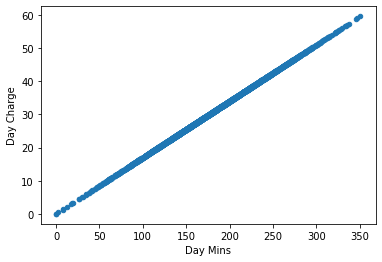

In [8]:
data.plot(kind = 'scatter', x = 'Day Mins', y = 'Day Charge')

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

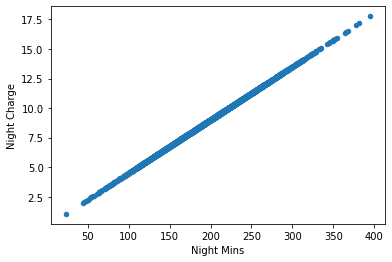

In [10]:
data.plot(kind = 'scatter', x = 'Night Mins', y = 'Night Charge')

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

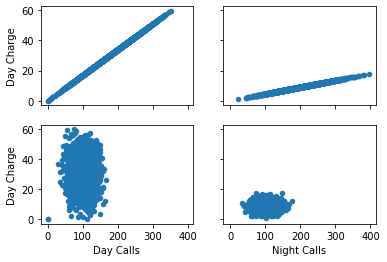

In [15]:
figure, axs = plt.subplots(2,2, sharex= True, sharey= True)
data.plot(kind = 'scatter', x = 'Day Mins', y = 'Day Charge', ax = axs[0][0])
data.plot(kind = 'scatter', x = 'Night Mins', y = 'Night Charge', ax = axs[0][1])
data.plot(kind = 'scatter', x = 'Day Calls', y = 'Day Charge', ax = axs[1][0])
data.plot(kind = 'scatter', x = 'Night Calls', y = 'Night Charge', ax = axs[1][1])

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

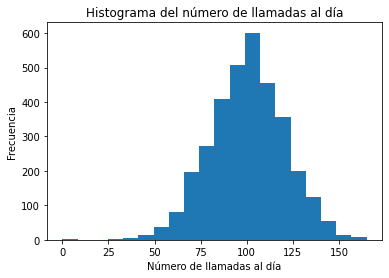

In [18]:
plt.hist(data['Day Calls'], bins = 20)
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de llamadas al día')

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

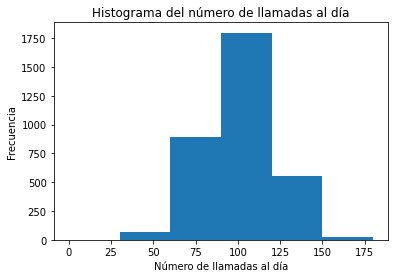

In [20]:
plt.hist(data['Day Calls'], bins = [0,30,60,90,120,150,180])
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de llamadas al día')

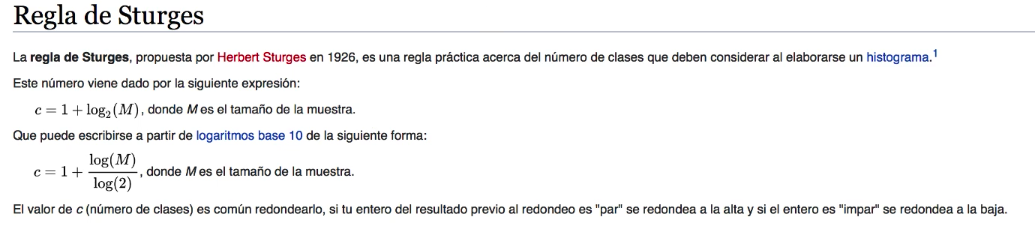

Para definir el número de bins del histograma

In [25]:
k = int(1 + np.ceil(np.log2(len(data))))
k

13

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

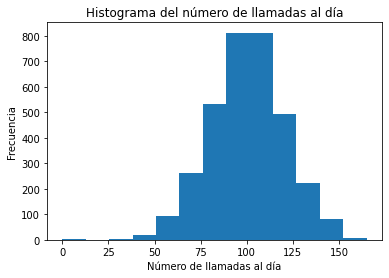

In [26]:
k = int(1 + np.ceil(np.log2(len(data))))

plt.hist(data['Day Calls'], bins = k)
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de llamadas al día')

# Diagrama de caja y bigote

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

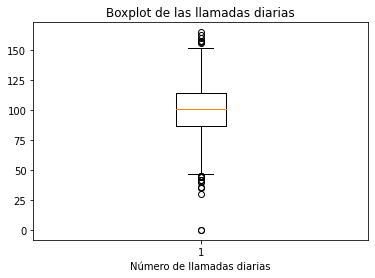

In [28]:
plt.boxplot(data['Day Calls'])
plt.xlabel('Número de llamadas diarias')
plt.title('Boxplot de las llamadas diarias')

In [30]:
data['Day Calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

Rango intercuartil = 75% - 25%

rayas de los bigotes = 1.5 * RI

RI = 114 - 87 = 27

In [31]:
IQR = data['Day Calls'].quantile(0.75) - data['Day Calls'].quantile(0.25)
IQR

27.0

In [32]:
data['Day Calls'].quantile(0.25) - 1.5*IQR

46.5

In [34]:
data['Day Calls'].quantile(0.75) + 1.5*IQR

154.5

### Todo lo que esté ahí abajo o arriba de ese rango (46.5, 154.5) son OUTLIERS